<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#D.-Systematische-Handelsstrategien" data-toc-modified-id="D.-Systematische-Handelsstrategien-1">D. Systematische Handelsstrategien</a></span></li><li><span><a href="#D.1-Ein-Asset-Strategien" data-toc-modified-id="D.1-Ein-Asset-Strategien-2">D.1 Ein-Asset-Strategien</a></span></li><li><span><a href="#D.1.2-Momentum-Strategien" data-toc-modified-id="D.1.2-Momentum-Strategien-3">D.1.2 Momentum-Strategien</a></span><ul class="toc-item"><li><span><a href="#1.-Grundlagen" data-toc-modified-id="1.-Grundlagen-3.1">1. Grundlagen</a></span><ul class="toc-item"><li><span><a href="#Momentum-und-Autokorrelation" data-toc-modified-id="Momentum-und-Autokorrelation-3.1.1">Momentum und Autokorrelation</a></span></li><li><span><a href="#Prüfen-auf-Autokorrelation" data-toc-modified-id="Prüfen-auf-Autokorrelation-3.1.2">Prüfen auf Autokorrelation</a></span></li><li><span><a href="#Momentum-vs.-Mean-Reversion" data-toc-modified-id="Momentum-vs.-Mean-Reversion-3.1.3">Momentum vs. Mean Reversion</a></span></li><li><span><a href="#Der-Zeitrahmen-ist-wichtig" data-toc-modified-id="Der-Zeitrahmen-ist-wichtig-3.1.4">Der Zeitrahmen ist wichtig</a></span></li><li><span><a href="#Der-Zeitrahmen-ist-wichtig-für-die-Prognosefähigkeit" data-toc-modified-id="Der-Zeitrahmen-ist-wichtig-für-die-Prognosefähigkeit-3.1.5">Der Zeitrahmen ist wichtig für die Prognosefähigkeit</a></span></li><li><span><a href="#WICHTIG-bei-der-Modellauswahl:-Overfitting-vermeiden!" data-toc-modified-id="WICHTIG-bei-der-Modellauswahl:-Overfitting-vermeiden!-3.1.6">WICHTIG bei der Modellauswahl: Overfitting vermeiden!</a></span></li><li><span><a href="#Handeln-auf-Momentum" data-toc-modified-id="Handeln-auf-Momentum-3.1.7">Handeln auf Momentum</a></span><ul class="toc-item"><li><span><a href="#--Momentum-messen" data-toc-modified-id="--Momentum-messen-3.1.7.1">- Momentum messen</a></span></li><li><span><a href="#---Einstiegs--und-Ausstiegssignale" data-toc-modified-id="---Einstiegs--und-Ausstiegssignale-3.1.7.2">-  Einstiegs- und Ausstiegssignale</a></span></li><li><span><a href="#--Sortierung-von-Aktien-für-Long-Short-Portfolios-(Cross-Sectional-Momentum)" data-toc-modified-id="--Sortierung-von-Aktien-für-Long-Short-Portfolios-(Cross-Sectional-Momentum)-3.1.7.3">- Sortierung von Aktien für Long-Short Portfolios (Cross-Sectional Momentum)</a></span></li></ul></li></ul></li></ul></li></ul></div> 

# D. Systematische Handelsstrategien
# D.1 Ein-Asset-Strategien
# D.1.2 Momentum-Strategien
## 1. Grundlagen
Momentum Trading bezieht sich auf eine Klasse von Strategien, die bestehende Trends extrapolieren. Diese Strategien gehen davon aus, dass Aktien, die im Preis steigen, temporär weiter steigen und Aktien, die im Preis fallen, weiter fallen werden, und kaufen und verkaufen dementsprechend. Dies steht im Gegensatz zu Mean Reversion Strategien, die sich auf Trends stützen, die ihre Richtung umkehren.

Unten sehen wir ein Beispiel für eine Aktie (Apple, Ticker: AAPL) deren Preis um einen steigenden Trend schwankt.

In [1]:
# Import libraries to find linear trend and plot data
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas_datareader.data as web

In [2]:
# Load pricing data for an asset
start = '2014-01-01'
end = '2015-01-01'

prices = web.get_data_yahoo(['AAPL'], start, end)['Adj Close']
prices = pd.DataFrame(prices)
dates = prices.index

# Plot the price of the asset over time
plt.figure(figsize=(15,7))
plt.plot(prices['AAPL'])

# Find the line of best fit to illustrate the trend
X = np.arange(len(dates))
x = sm.add_constant(X) # Add a column of ones so that line can have a y-intercept
model = regression.linear_model.OLS(prices['AAPL'], x).fit()
a = model.params[0] # Get coefficients of line
b = model.params[1]
prices['Y_hat'] = X * b + a
plt.plot(prices['Y_hat'], 'r', alpha=0.9)
plt.ylabel('Price')
plt.legend(['AAPL', 'Trendline'])
plt.show()

TypeError: string indices must be integers

Die Hypothese ist hier, dass sich die Preisbewegungen der Aktie aus einem Aufwärtstrend, der durch das lineare Modell erfasst wird, und Zufallsrauschen (Noise) zusammensetzen.

### Momentum und Autokorrelation

Viele finanzwirtschaftliche Zeitreihen weissen Autokorrelation auf. Eine intuitive Erklärung dafür ist, dass Preise von Wertpapierhändlern bestimmt werden, die bei der Festlegung neuer Preise die vergangenen Preise mitberücksichtigen:

$$P_t = T_t + \epsilon$$
$$T_t = X + P_{t-1}$$
$$P_t = X + P_{t-1} + \epsilon$$

wobei X alle anderen, von den Händlern berücksichtigte Faktoren abdeckt und $\epsilon$ wie üblich Zufallsrauchen darstellt. Dies ist die Definition einer autokorrelierten Zeitreihe, in der der Wert zum Zeitpunkt $t$ von vorangehenden Werten abhängt.

Einige Formen von Autokorrelation implizieren kein Momentum. Zum Beispiel könnte eine sehr einfache Autokorrelationsbeziehung wie folgt aussehen:

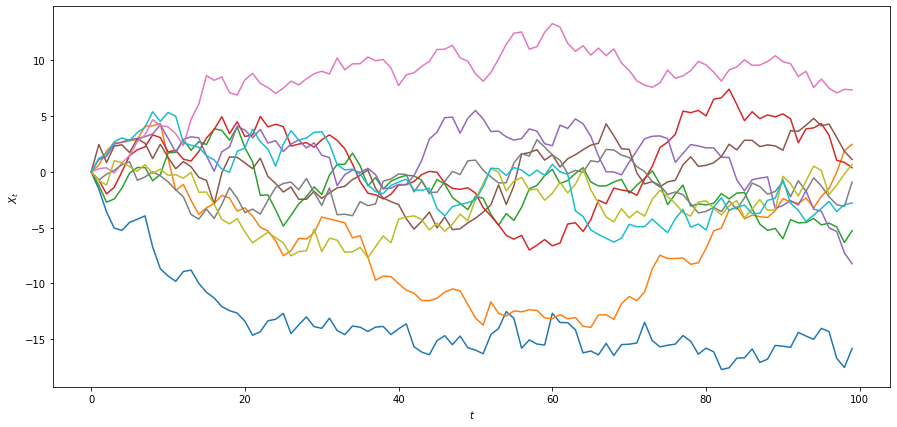

In [3]:
def generate_autocorrelated_values(N):
    X = np.zeros(N)
    for i in range(N-1):
        X[i+1] = X[i] + np.random.normal(0, 1)
    return X

plt.figure(figsize=(15,7))
for i in range(10):
    X = generate_autocorrelated_values(100)
    plt.plot(X)
plt.xlabel('$t$')
plt.ylabel('$X_t$')
plt.show()

Diese Zeitreihen haben kein Momentum, da der Betrag, um den sie sich pro Zeitinterval auf- oder abwärts bewegen, rein zufällig ist. Wenn die Renditen der Zeitreihen jedoch autokorreliert sind, dann liegt Momentum vor. Wir können dies wie folgt simulieren.

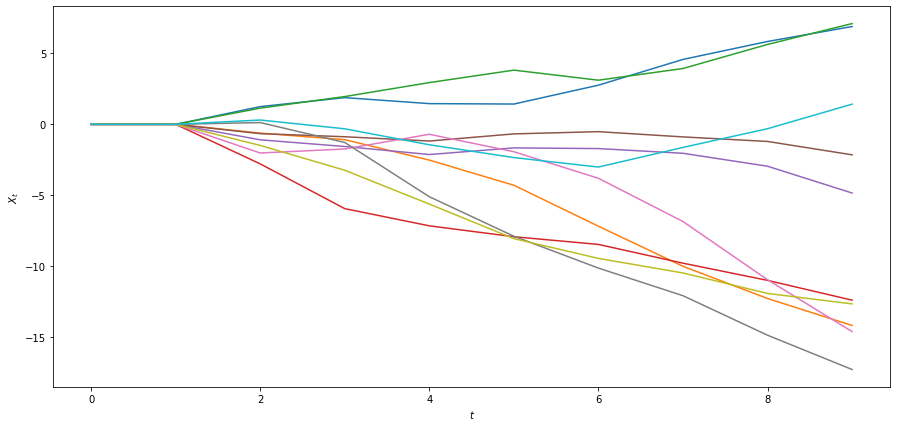

In [4]:
def generate_autocorrelated_values(N):
    X = np.zeros(N)
    for i in range(1, N-1):
        # Do the past returns 'look good' to investors
        past_returns = X[i] - X[i-1]
        # Investors hypothesize that future returns will be equal to past returns and buy at that price
        X[i+1] = X[i] + past_returns + np.random.normal(0, 1)
    return X

plt.figure(figsize=(15,7))
for i in range(10):
    X = generate_autocorrelated_values(10)
    plt.plot(X)
plt.xlabel('$t$')
plt.ylabel('$X_t$')
plt.show()

Es ist klar zu erkennen, dass ein Momentum Effekt resultiert wenn Investoren Informationen über vergangene Renditen in den zukünftigen Kurs einfließen lassen. In realen Daten wird dies natürlich weitaus schwieriger zu beobachten sein.

### Prüfen auf Autokorrelation

Wir können Autokorrelation auf unterschiedliche Arten testen. Ein Weg ist zu prüfen, ob der datengenerierende Prozeß eine Einheitswurzel hat. Ist dies der Fall, dann liegt eine nichtstationäre Zeitreihe vor, und Autokorrelation ist wahrscheinlich.

In [5]:
from statsmodels.tsa.stattools import adfuller

X1 = generate_autocorrelated_values(100)
X2 = np.random.normal(0, 1, 100)

# Compute the p-value of the Dickey-Fuller statistic to test the null hypothesis that a time series has a unit root
print('X1')
_, pvalue, _, _, _, _ = adfuller(X1)
if pvalue > 0.05:
    print('We cannot reject the null hypothesis that the series has a unit root.')
else:
    print('We reject the null hypothesis that the series has a unit root.')
print('X2')
_, pvalue, _, _, _, _ = adfuller(X2)
if pvalue > 0.05:
    print('We cannot reject the null hypothesis that the series has a unit root.')
else:
    print('We reject the null hypothesis that the series has a unit root.')

X1
We cannot reject the null hypothesis that the series has a unit root.
X2
We reject the null hypothesis that the series has a unit root.


### Momentum vs. Mean Reversion

Momentum und Mean Reversion sind in gewisser Weise entgegengesetzte Strategien. In einem Momentum Modell geht man von der Hypothese aus, dass eine vergangene Aufwärtsbewegung ein Hinweis auf eine zukünftige Aufwärtsbewegung ist. In einem Mean Reversion Modell geht man davon aus, dass vergangene Aufwärtstrends lediglich vorübergehende Überbewertungen sind und sich der Kurs wieder normalisieren wird. Beides sind wichtige Modelle, die in verschiedenen Fällen funktionieren.

Es ist wichtig zu prüfen, welches Verhaltensmuster unsere Daten aufweisen, bevor wir versuchen, eine darauf basierende Strategie zu entwickeln.

### Der Zeitrahmen ist wichtig

Momentum und Mean Reversion können beide bei ein und demselben Asset auftreten. Nehmen wir zum Beispiel wieder AAPL. Wir können einen Aufwärtstrend erkennen, aber es gibt auch eine Bewegung um diesen Trend herum. Ein Ansatz könnte darin bestehen, im Rahmen einer Buy-and-Hold Strategie über einen längeren Zeitrahmen Geld zu verdienen. Ein anderer Ansatz wäre, AAPL immer dann zu kaufen, wenn der Aktienkurs unter die Trendlinie fällt, und sie zu verkaufen, wenn der Kurs darüber liegt. Diese Strategie würde in einem kürzeren Zeitrahmen funktionieren.

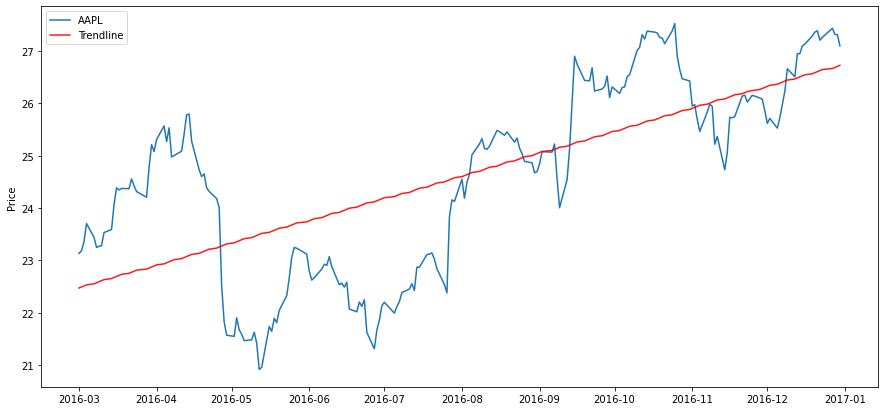

In [6]:
# Load pricing data for an asset
start = '2016-03-01'
end = '2017-01-01'

prices = web.get_data_yahoo(['AAPL'], start, end)['Adj Close']
prices = pd.DataFrame(prices)
dates = prices.index

# Plot the price of the asset over time
plt.figure(figsize=(15,7))
plt.plot(prices['AAPL'])

# Find the line of best fit to illustrate the trend
X = np.arange(len(dates))
x = sm.add_constant(X) # Add a column of ones so that line can have a y-intercept
model = regression.linear_model.OLS(prices['AAPL'], x).fit()
a = model.params[0] # Get coefficients of line
b = model.params[1]
prices['Y_hat'] = X * b + a
plt.plot(prices['Y_hat'], 'r', alpha=0.9)
plt.ylabel('Price')
plt.legend(['AAPL', 'Trendline'])
plt.show()

Um zu sehen, ob eine Mean Reversion Strategie funktionieren könnte, schauen wir uns den Unterschied zwischen dem Aktienkurs und der Vorhersage auf Basis eines linearen Modells an. Tatsächlich sieht es nach einer guten Gelegenheit für eine Mean Reversion Strategie aus, da die Preisdifferenz die Nulllinie häufig kreuzt.

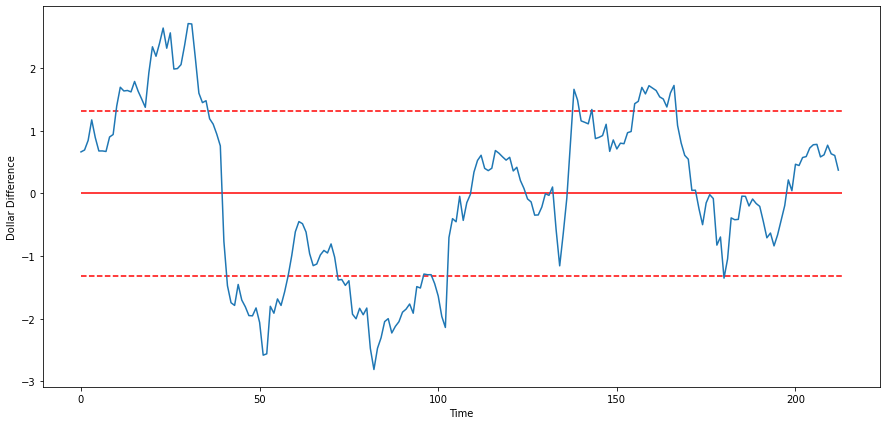

In [7]:
plt.figure(figsize=(15,7))
plt.plot((prices['AAPL'] - prices['Y_hat']).values)
plt.hlines(np.mean(prices['AAPL'] - prices['Y_hat']), 0, len(dates), colors='r')
plt.hlines(np.std(prices['AAPL'] - prices['Y_hat']), 0, len(dates), colors='r', linestyles='dashed')
plt.hlines(-np.std(prices['AAPL'] - prices['Y_hat']), 0, len(dates), colors='r', linestyles='dashed')
plt.xlabel('Time')
plt.ylabel('Dollar Difference')
plt.show()

### Der Zeitrahmen ist wichtig für die Prognosefähigkeit

Jedes Momentummaß wird für verschiedene Zeithorizonte über eine unterschiedlich starke Prognosefähigkeit verfügen. Einige prognostizieren gut über Jahre und andere nur über wenige Tage. Dies wird auch für verschiedene Anlageklassen gelten. Einige Anlageklassen besitzen eine Momentum-Dynamik über Jahre und einige über Tage. Es ist wichtig, bei der Erstellung eines Momentummodells im Auge zu behalten, welcher Zeitrahmen sinnvoll ist. Dieser Zeitrahmen sollte in etwa dem Zeitrahmen entsprechen, nach dem wir unser Portfolio neu ausbalancieren oder aus der Strategie aussteigen. Es sollte natürlich auch der Zeitrahmen sein, den wir bei der Messung der Prognosekapazität unseres Modells verwenden.

### WICHTIG bei der Modellauswahl: Overfitting vermeiden!
Bei der Auswahl eines geeigneten Momentum-Maßes ist es wiederum wichtig, die bekannte Overfitting Problematik zu vermeiden. Das beste Maß für einen Trainingsdatensatz (In-Sample Daten) ist mit hoher Wahrscheinlichkeit nicht optimal für Out-of-Sample Daten. Wie immer gilt auch hier, das fitten von Noise zu vermeiden! 

Ein besserer Ansatz besteht darin, die Erstellung des Momentum Modells von fundamentalen Faktoren abhängig zu machen, von denen Sie vermuten, dass diese für Ihre Daten zutreffen. Ein Beispiel für einen möglichen Modellentwicklungsprozeß:
1. Auf Grundlage der Anlegerpsychologie könnte die Hypothese aufgestellt werden, das bestimmte Aktien ein Momentumverhalten aufweisen sollten.
2. Konstruieren Sie ein mathematisches Modell, das dieser Hypothese folgt.
3. Testen Sie Ihre Hypothese, indem Sie das Modell an Ihre Daten fitten.
4. Testen Sie Ihr Modell auf Out-of-Sample Daten.

### Handeln auf Momentum

#### - Momentum messen

Um auf Momentum handeln zu können, müssen wir zunächst in der Lage sein, es zu messen. Wir werden im Folgenden besprechen, was wir tun können, sobald wir ein Maß für Momentum entwickelt haben.


#### -  Einstiegs- und Ausstiegssignale

Eine Möglichkeit auf Momentum zu handeln besteht darin, einen Cutoff Wert festzulegen und eine Position zu kaufen, wenn das Momentumsignal signifikant hoch ist, und die Position wieder zu schliessen, wenn das Signal entsprechend niedrig ist. Dies kann auch bei Leerverkäufen von Aktien geschehen, wenn wir eine negative Kursdynamik sehen. Ein gutes Beispiel hierfür wäre die Crossover-Strategie des gleitenden Durchschnitts, die im Abschnitt D.1.2.2 erörtert wird.

#### - Sortierung von Aktien für Long-Short Portfolios (Cross-Sectional Momentum)

Ein anderer Ansatz besteht darin, Momentum als Faktor für die Sortierung von Aktien zu nutzen. Der allgemeine Ansatz und seine Vorteile werden später im Abschnitt *D.2.1 Long-Short Strategien* beschrieben. Kurz gesagt, man wettet darauf, dass Aktien mit höherem Momentum diejenigen mit niedrigerem Momentum outperformen. Dies ist ein marktneutraler und robuster Ansatz, der zudem den Vorteil besitzt Momentum nicht absolut, sondern relativ zu messen. Momentum könnte hier auch als einer von mehreren Faktoren in einem Rankingschema verwendet werden.